In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as plot

plt.style.use('ggplot')
plt.matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['legend.fontsize'] = 16



## test for the sequence of $\lambda_k = e^{\alpha k} - 1$, $\alpha>0$ (positive exponentials)

In [2]:
tau = 0.98
alpha = 1/tau - 1

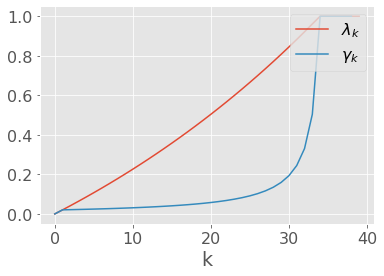

In [3]:
k = np.arange(0, 40)
lambdas_pos_exp = np.minimum(np.exp(alpha * k) - 1, 1)
gammas_pos_exp = [lambdas_pos_exp[0]]
n = len(lambdas_pos_exp)
for k in range(1, n-1):
    if(lambdas_pos_exp[k] < 0.9999999):
        gammak =  (lambdas_pos_exp[k] - lambdas_pos_exp[k-1]) / (1 - lambdas_pos_exp[k-1]) 
        gammas_pos_exp.append(gammak)
    else:
        gammas_pos_exp.append(1)
plt.xlabel('k')
plt.plot(lambdas_pos_exp, label = '$\lambda_k $')
plt.plot(gammas_pos_exp, label = '$\gamma_k $')
plot.legend(loc=1)
plt.show()

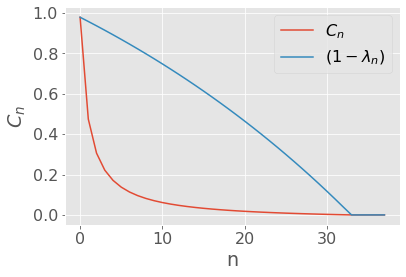

In [4]:
rate_lambdas_pos_exp = []
rate_lambdas_pos_exp_theo = []
C = 0
for k in range(1, n-1):
    if(lambdas_pos_exp[k] == 1):
        rate_lambdas_pos_exp.append(0)
    else:
        C += ( (lambdas_pos_exp[k] - lambdas_pos_exp[k-1]) / ((1 - lambdas_pos_exp[k]) * (1 - lambdas_pos_exp[k-1])))/lambdas_pos_exp[1]
        rate_lambdas_pos_exp.append(C**(-1))
    rate_lambdas_pos_exp_theo.append((1-lambdas_pos_exp[k]))
    
plt.xlabel('n')
plt.ylabel('$C_n$')
plt.plot(rate_lambdas_pos_exp, label = '$C_n$')
plt.plot(rate_lambdas_pos_exp_theo, label = '$(1-\lambda_n)$')
plot.legend(loc=1)
plt.show()

## test for the sequence of $\lambda_k = 1- e^{\alpha k}$, $\alpha<0$ (negative exponentials)

In [5]:
tau = 2
alpha = 1/tau - 1
gamma = 1 - np.exp(alpha)

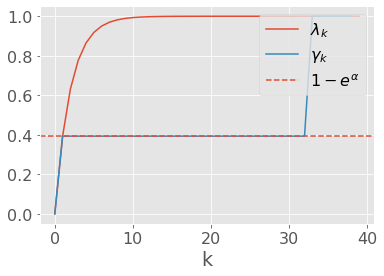

In [6]:
k = np.arange(0, 40)
lambdas_neg_exp = np.minimum(1 - np.exp(alpha * k), 1)
gammas_neg_exp = [lambdas_neg_exp[0]]
n = len(lambdas_neg_exp)
for k in range(1, n-1):
    if(lambdas_neg_exp[k] < 0.9999999):
        gammak =  (lambdas_neg_exp[k] - lambdas_neg_exp[k-1]) / (1 - lambdas_neg_exp[k-1]) 
        gammas_neg_exp.append(gammak)
    else:
        gammas_neg_exp.append(1)
plt.xlabel('k')
plt.plot(lambdas_neg_exp, label = '$\lambda_k $')
plt.plot(gammas_neg_exp, label = '$\gamma_k $')
plt.axhline(y=gamma,linestyle='--', label = '$1-e^{\\alpha}$')
plot.legend(loc=1)
plt.show()

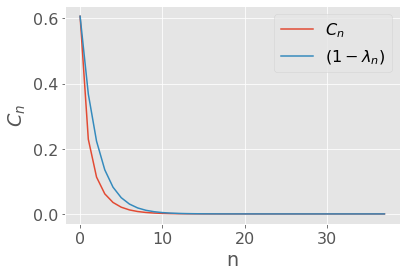

In [7]:
rate_lambdas_neg_exp = []
rate_lambdas_neg_exp_theo = []
C = 0
for k in range(1, n-1):
    if(lambdas_neg_exp[k] == 1):
        rate_lambdas_neg_exp.append(0)
    else:
        C += ( (lambdas_neg_exp[k] - lambdas_neg_exp[k-1]) / ((1 - lambdas_neg_exp[k]) * (1 - lambdas_neg_exp[k-1])))/lambdas_neg_exp[1]
        rate_lambdas_neg_exp.append(C**(-1))
    rate_lambdas_neg_exp_theo.append((1-lambdas_neg_exp[k]))
    
plt.xlabel('n')
plt.ylabel('$C_n$')
plt.plot(rate_lambdas_neg_exp, label = '$C_n$')
plt.plot(rate_lambdas_neg_exp_theo, label = '$(1-\lambda_n)$')
plot.legend(loc=1)
plt.show()

## test for the sequence of $\lambda_k = mk$ (linear)

In [8]:
m = 0.04

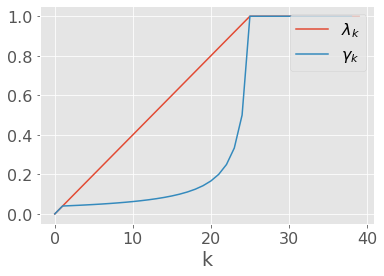

In [9]:
k = np.arange(0, 40)
lambdas_linear = np.minimum(m*k, 1)
gammas_linear = [lambdas_linear[0]]
n = len(lambdas_linear)
for k in range(1, n-1):
    if(lambdas_linear[k] < 0.9999999):
        gammak =  (lambdas_linear[k] - lambdas_linear[k-1]) / (1 - lambdas_linear[k-1]) 
        gammas_linear.append(gammak)
    else:
        gammas_linear.append(1)
plt.xlabel('k')
plt.plot(lambdas_linear, label = '$\lambda_k $')
plt.plot(gammas_linear, label = '$\gamma_k $')
plot.legend(loc=1)
plt.show()

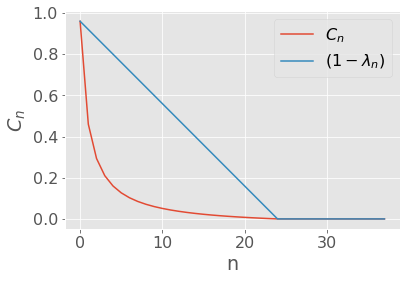

In [10]:
rate_lambdas_linear = []
rate_lambdas_linear_theo = []
C = 0
for k in range(1, n-1):
    if(lambdas_linear[k] == 1):
        rate_lambdas_linear.append(0)
    else:
        C += ( (lambdas_linear[k] - lambdas_linear[k-1]) / ((1 - lambdas_linear[k]) * (1 - lambdas_linear[k-1])))/lambdas_linear[1]
        rate_lambdas_linear.append(C**(-1))
    rate_lambdas_linear_theo.append((1-lambdas_linear[k]))
    
plt.xlabel('n')
plt.ylabel('$C_n$')
plt.plot(rate_lambdas_linear, label = '$C_n$')
plt.plot(rate_lambdas_linear_theo, label = '$(1-\lambda_n)$')
plot.legend(loc=1)
plt.show()

## Plot -- $\lambda$

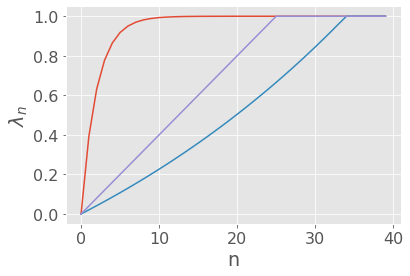

In [11]:

plt.xlabel('n')
plt.ylabel('$\lambda_n$')
plt.plot(lambdas_neg_exp, label = '$\lambda_n  = 1 - e^{\\alpha n}$')
plt.plot(lambdas_pos_exp, label = '$\lambda_n  = e^{\\alpha n} - 1$')
plt.plot(lambdas_linear, label = '$\lambda_n  = mn$')
#legend = plt.legend(loc='lower center', prop={'size': 20}, bbox_to_anchor = (0.5, -0.5), ncol = 3) #prop={'size': 13},
# plt.show()

plt.savefig('lambda.pdf', bbox_inches = 'tight')

In [12]:
def export_legend(legend, filename="legend.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

NameError: name 'legend' is not defined

## Plot -- $\gamma$

In [ ]:
plt.xlabel('n')
plt.ylabel('$\gamma_n$')
plt.plot(gammas_neg_exp[1:], label = '$\lambda_n  = e^{\\alpha n} - 1$')
plt.plot(gammas_pos_exp[1:], label = '$\lambda_n  = 1 - e^{\\alpha n}$')
plt.plot(gammas_linear[1:], label = '$\lambda_n  = mn$')
# plot.legend(loc=1, prop={'size': 11})
# plt.show()
plt.savefig('gamma.pdf', bbox_inches = 'tight')

## Plot -- rates

In [ ]:
plt.xlabel('n', fontsize=18)
plt.ylabel('$C_n$', fontsize=18)
# plt.yscale('log')
line, = plt.plot(rate_lambdas_neg_exp, label = '$\lambda_n  = 1- e^{\\alpha n}$')
plt.plot(rate_lambdas_neg_exp_theo, label = '$e^{\\alpha n}$', color = line.get_color(), linestyle = 'dotted')
line, = plt.plot(rate_lambdas_pos_exp, label = '$\lambda_n  = e^{\\alpha n} - 1$')
plt.plot(rate_lambdas_pos_exp_theo, label = '$(2-e^{\\alpha n})$', color = line.get_color(), linestyle = 'dotted')
line, = plt.plot(rate_lambdas_linear, label = '$\lambda_n  = mn$')
plt.plot(rate_lambdas_linear_theo, label = '$(1-mn)$', color = line.get_color(), linestyle = 'dotted')
# plot.legend(loc=1, prop={'size': 11})
# plt.show()
plt.savefig('rate.pdf', bbox_inches = 'tight')